# Chase Winslow

## What amateur teams have found the most success at producing NHL skaters and which are the best at producing goalies? 
These graphs will find which amateur teams and leagues have produced the best players. It will be interesting to if there are junior teams for each or if a team dominates both categories.


In [237]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [238]:
#Loading and processing data into df1982
from typing import TYPE_CHECKING
if TYPE_CHECKING:
    from .code import project_functions3
else:
    import sys
    sys.path.append("./code")
    import project_functions3

df = project_functions3.load_and_process("../data/raw/NHLDraft.csv")
df

,year,overall_pick,team,player,position,amateur_team,games_played,goals,assists,points,goalie_games_played,goalie_wins,score
0,2022,1,Montreal Canadiens,Juraj Slafkovsky,LW,TPS (Finland),NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2022,2,New Jersey Devils,Simon Nemec,D,HK Nitra (Slovakia),NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2022,3,Arizona Coyotes,Logan Cooley,C,USA U-18 Development Team (USDP/USHL),NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2022,4,Seattle Kraken,Shane Wright,C,Kingston Frontenacs (OHL),NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2022,5,Philadelphia Flyers,Cutter Gauthier,LW,USA U-18 Development Team (USDP/USHL),NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9924,1982,249,Boston Bruins,Bruno Campese,G,Northern Michigan (CCHA),NaN,NaN,NaN,NaN,NaN,NaN,NaN
9925,1982,250,Montreal Canadiens,Bill Brauer,D,Edina HS (High-MN),NaN,NaN,NaN,NaN,NaN,NaN,NaN
9926,1982,251,Edmonton Oilers,Jeff Crawford,LW,Regina Pats (WHL),NaN,NaN,NaN,NaN,NaN,NaN,NaN
9927,1982,252,New York Islanders,Jim Koudys,D,Sudbury Wolves (OHL),NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [239]:
#SK = Slovakia, US = USA, CA = Canada, SE = Sweden, AT = Austria, RU = Russia, FI = Finland, CH = Switzerland
#CZ = Czechia, DE = Germany, LV = Latvia, PL = Poland < 10, BY = Belarus, GB = Great Britain, KZ = Kazakhstan
#NO = Norway, UA = Ukraine, UZ = Uzbekistan <10, DK = Denmark, AU = Australia <10, TH = Thailand <10, JM = Jamacia<10
#FR = France <10, SI = Slovenia <10, BE = Belgium <10, NL = Netherlands <10, CN = China <10, LT = Lithuania<10, IT = Italy<10
#NG = Nigeria<10, EE = Estonia<10, JP = Japan<10, ME = Serbia<10, HU = Hungary<10, YU = Yugoslavia<10, BS = Bahamas<10, BR = Brazil<10
#TZ = Tanzania<10, BN = Brunei<10, KR = South Korea<10, ZA = South Africa<10, SU = Soviet Union<10, HT = Haiti<10
#TW = Taiwan<10, PY = Paraguay<10, VE = Venezuela<10

In [240]:
sns.set_theme(style="ticks",
              font_scale=1.3, # This scales the fonts slightly higher
             )
plt.rc("axes.spines", top=False, right=False)

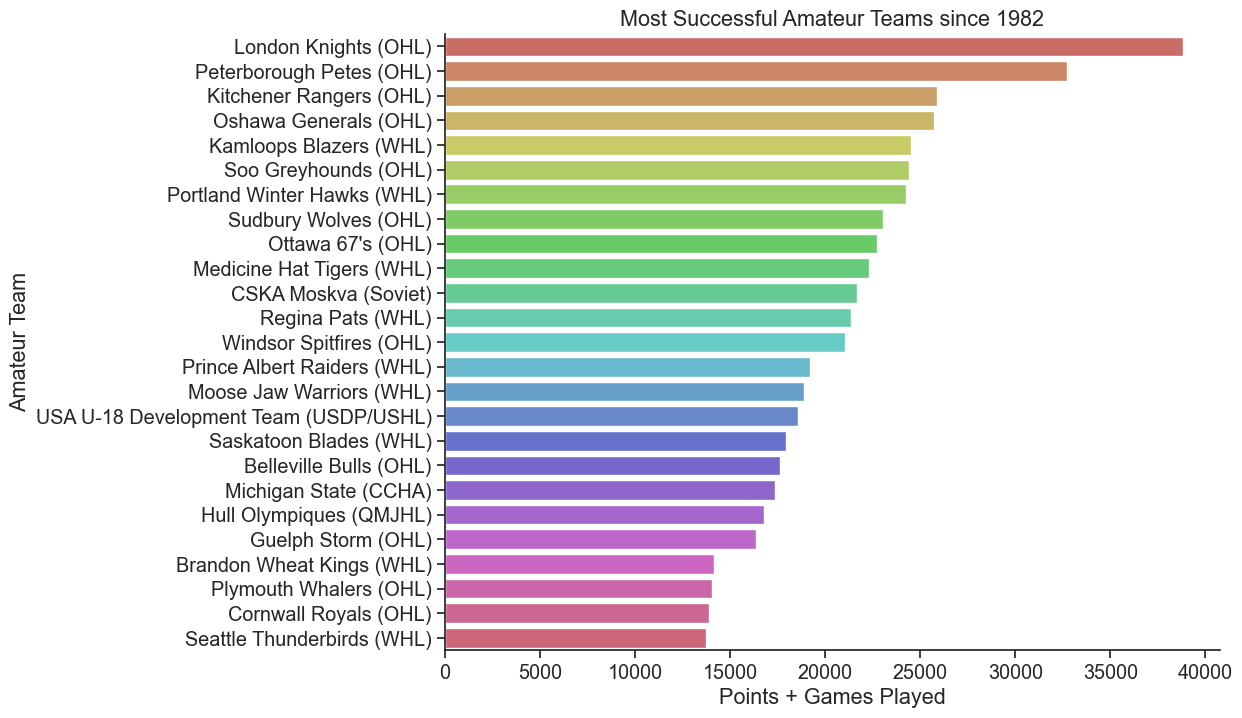

In [241]:
# Filter data to include only players with an amateur team
df_amateur = df[df['amateur_team'].notnull()]

# Calculate total score for each team
df_scores = df_amateur.groupby('amateur_team')[['games_played', 'points']].sum(numeric_only=False)
df_scores['score'] = df_scores['games_played'] + df_scores['points']
df_scores = df_scores.sort_values('score', ascending=False)[:25]
df_scores['amateur_team'] = df_scores.index

# Set color palette
colors = sns.color_palette("hls", len(df_scores))

# Set figure size
plt.figure(figsize=(10, 8))

# Generate plot using seaborn
sns.barplot(x='score', y='amateur_team', data=df_scores, order=df_scores['amateur_team'], palette=colors)
plt.title('Most Successful Amateur Teams since 1982')
plt.ylabel('Amateur Team')
plt.xlabel('Points + Games Played')

# Show plot
plt.show()



This graph shows the most susscessful junior programs since 1982. There is a clear dominance of OHL teams at the top with 7 spots in the top 10. Both London and Peterborough and big leads on the teams below them. The first European team is CSKA Moskva which shows Canada's clear production of great young prospects.

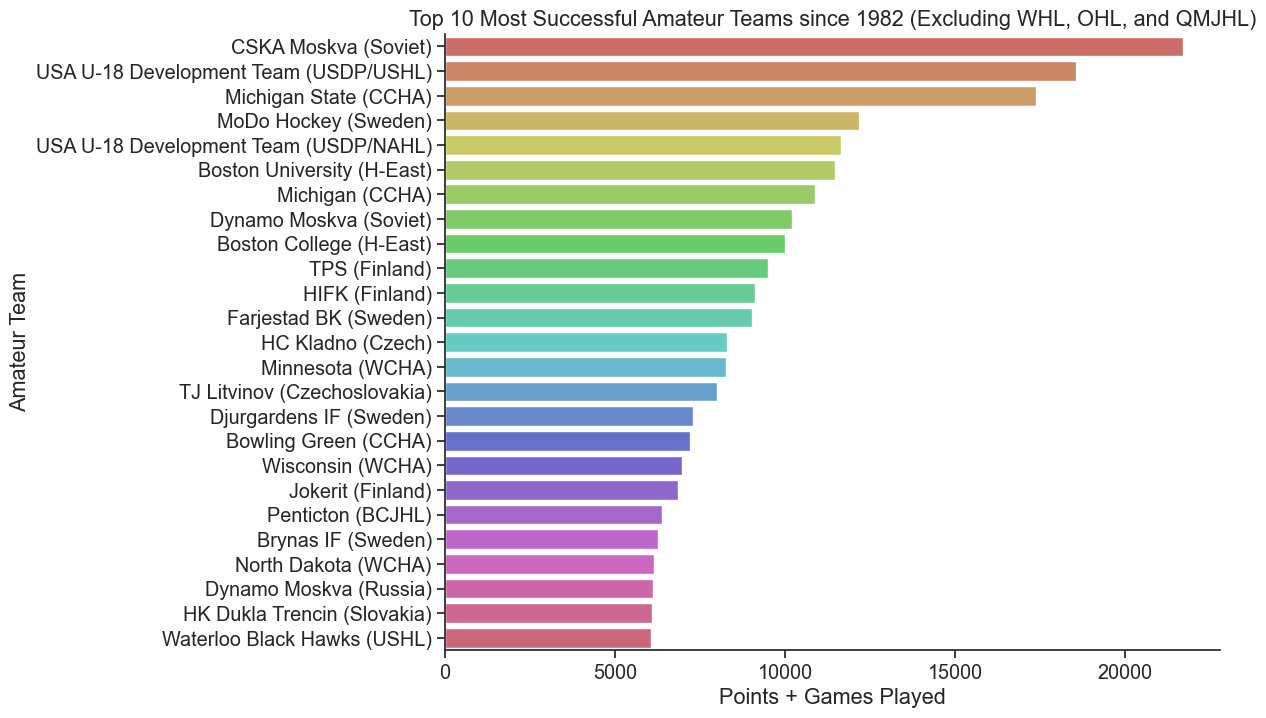

In [242]:
# Filter data to include only players with an amateur team and not from WHL, OHL or QMJHL
df_amateur = df[df['amateur_team'].notnull()]
df_amateur = df_amateur[~df_amateur['amateur_team'].str.contains('WHL|OHL|QMJHL')]

# Calculate total score for each team
df_scores = df_amateur.groupby('amateur_team').sum(numeric_only=True)[['games_played', 'points']]
df_scores['score'] = df_scores['games_played'] + df_scores['points']
df_scores = df_scores.sort_values('score', ascending=False)[:25]
df_scores['amateur_team'] = df_scores.index

# Set color palette
colors = sns.color_palette("hls", len(df_scores))

# Set figure size
plt.figure(figsize=(10, 8))

# Generate plot using seaborn
sns.barplot(x='score', y='amateur_team', data=df_scores, order=df_scores['amateur_team'], palette=colors)
plt.title('Top 10 Most Successful Amateur Teams since 1982 (Excluding WHL, OHL, and QMJHL)')
plt.ylabel('Amateur Team')
plt.xlabel('Points + Games Played')

# Show plot
plt.show()



Outside of Canada, CSKA Moskva has a decent gap between them, second place USA U-18, and third place Michiagn State. After the teams start to average out and there is no clear country that dominates as the US, Finland, Sweden and Russia all have multiple teams listed. 

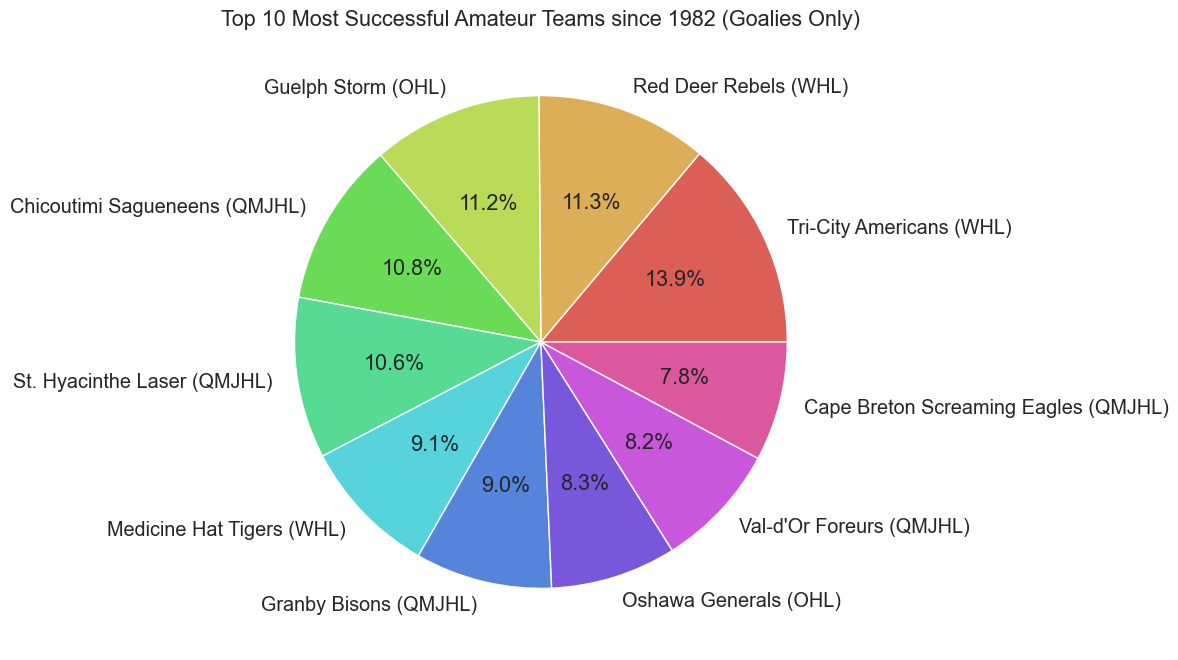

In [243]:
# Filter data to include only goalies with an amateur team
df_goalies = df[df['position'] == 'G']
df_amateur_goalies = df_goalies[df_goalies['amateur_team'].notnull()]


# Calculate total score for each team
Gdf = df_amateur_goalies.groupby('amateur_team', as_index=False).sum(numeric_only=True)[['amateur_team', 'goalie_games_played', 'goalie_wins']]
Gdf['score'] = Gdf['goalie_games_played'] + Gdf['goalie_wins']
Gdf = Gdf.sort_values('score', ascending=False)[:10]

# Set color palette
colors = sns.color_palette("hls", len(Gdf))

# Set figure size
fig = plt.figure(figsize=(10, 8))

# Generate plot using matplotlib
ax = fig.add_subplot(111)
ax.pie(Gdf['score'], labels=Gdf['amateur_team'], colors=colors, autopct='%1.1f%%')

# Set title and axis labels
plt.title('Top 10 Most Successful Amateur Teams since 1982 (Goalies Only)')


# Show plot
plt.show()




This graph shows the top goalie producing teams since 1982. Tri City(red) in the best team among all with Red Deer behind them. The postion has also been a strength for Canada over the years. All of the top 10 teams are from Canada.

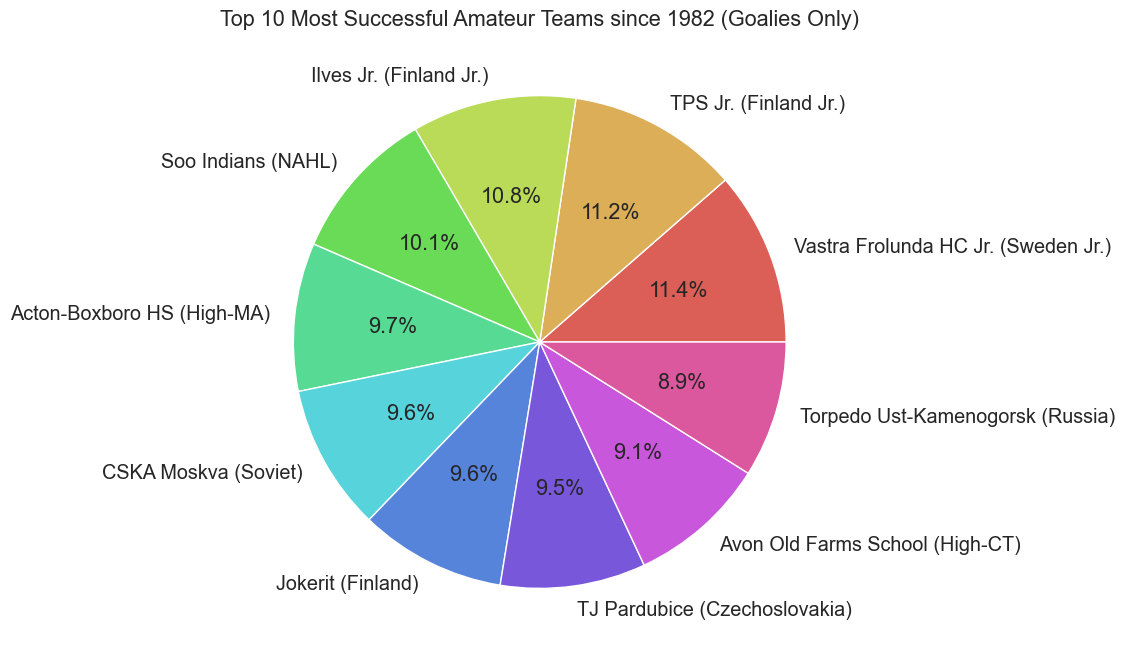

In [244]:
# Filter data to include only goalies with an amateur team
df_goalies = df[df['position'] == 'G']
df_amateur_goalies = df_goalies[df_goalies['amateur_team'].notnull()]
df_amateur_goalies = df_amateur_goalies[~df_amateur_goalies['amateur_team'].str.contains('WHL|OHL|QMJHL')]

# Calculate total score for each team
Gdf = df_amateur_goalies.groupby('amateur_team', as_index=False).sum(numeric_only=True)[['amateur_team', 'goalie_games_played', 'goalie_wins']]
Gdf['score'] = Gdf['goalie_games_played'] + Gdf['goalie_wins']
Gdf = Gdf.sort_values('score', ascending=False)[:10]

# Set color palette
colors = sns.color_palette("hls", len(Gdf))

# Set figure size
fig = plt.figure(figsize=(10, 8))

# Generate plot using matplotlib
ax = fig.add_subplot(111)
ax.pie(Gdf['score'], labels=Gdf['amateur_team'], colors=colors, autopct='%1.1f%%')

# Set title and axis labels
plt.title('Top 10 Most Successful Amateur Teams since 1982 (Goalies Only)')


# Show plot
plt.show()

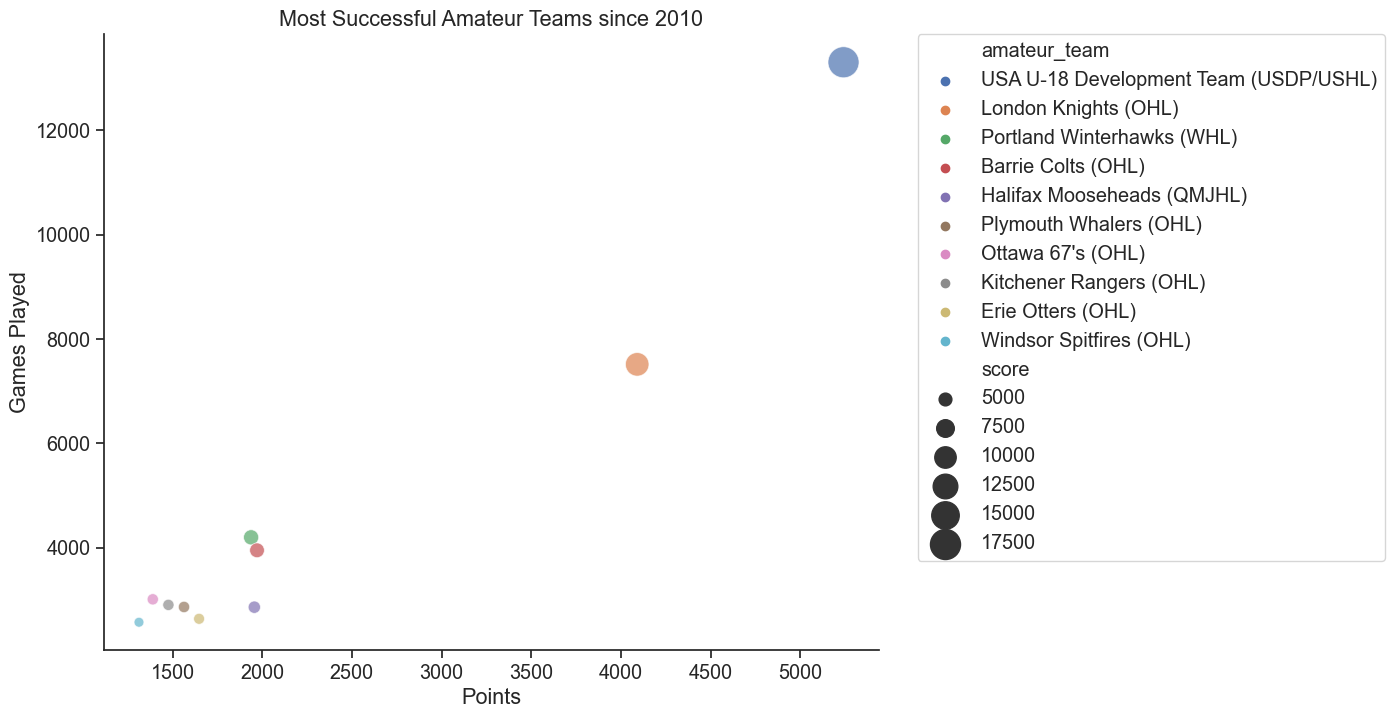

In [245]:
df2010 = df.loc[:2791]
# Filter data to include only players with an amateur team
df_amateur2 = df2010[df2010['amateur_team'].notnull()]

# Calculate total score for each team
df_scores2 = df_amateur2.groupby('amateur_team', as_index=False).sum(numeric_only=True)[['amateur_team', 'games_played', 'points']]
df_scores2['score'] = df_scores2['games_played'] + df_scores2['points']
df_scores2 = df_scores2.sort_values('score', ascending=False)[:10]

# Set figure size
plt.figure(figsize=(10, 8))

# Generate plot using seaborn
sns.scatterplot(x='points', y='games_played', size='score', hue='amateur_team', data=df_scores2, sizes=(50, 500), alpha=0.7)
plt.title('Most Successful Amateur Teams since 2010')
plt.ylabel('Games Played')
plt.xlabel('Points')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()


This graph shows the recent greatest of the USA Development team since 2010. When using data from 1982 the program was 16th, but since 2010 they have leapfrogged everyone by a huge margin. This is likely due to the increased interest in hockey in the US, as well as the fact for the US does not have the same system as Canada for young players. In Canada young players are drafted to a team in the WHL, OHL, or QMJHL depending on where they live. However, in the US the best young players can choose to play for the US Development team meaning the best young players almost always come from their team.